<a href="https://colab.research.google.com/github/sofiebudman/ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning with Scikit-Learn

Problem: Predict whether a given passenger will survive the Titanic.

Solution: Create a Classification model with the target variable as whether the passenger survived or not.  Use the passenger profile as the features.

Data is at https://www.kaggle.com/competitions/titanic/data

Use the dataset train.csv to train the test the model.  Use the dataset test.csv as the unseen data to do the predictions.

This notebook covers the basic Machine Learning process in Python step-by-step.

### Steps Covered


1. Importing  a DataFrame
2. Visualize the Data
3. Cleanup and Transform the Data
4. Encode the Data
5. Split Training and Test Sets
6. Train model
7. Interpret model
8. Predict for new data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline
from pandas.plotting import scatter_matrix
import sklearn


## CSV to DataFrame

CSV files can be loaded into a dataframe by calling `pd.read_csv` . After loading the training and test files, print a `sample` to see what you're working with.

The data is split into 2 parts
1. train.csv which should be used to train and test the model (Assignment: Why do you need to test the model?)
2. test.csv which can be used a 'new' data to predict survival for passengers

In [34]:
#Import data
data_train = pd.read_csv("/content/drive/MyDrive/train.csv",delimiter=",")
data_test = pd.read_csv("/content/drive/MyDrive/test.csv", delimiter=",")

In [35]:
data_train.head() # Assignment: What does NaN mean?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualizing Data

Visualizing data is crucial for recognizing underlying patterns to exploit in the model.

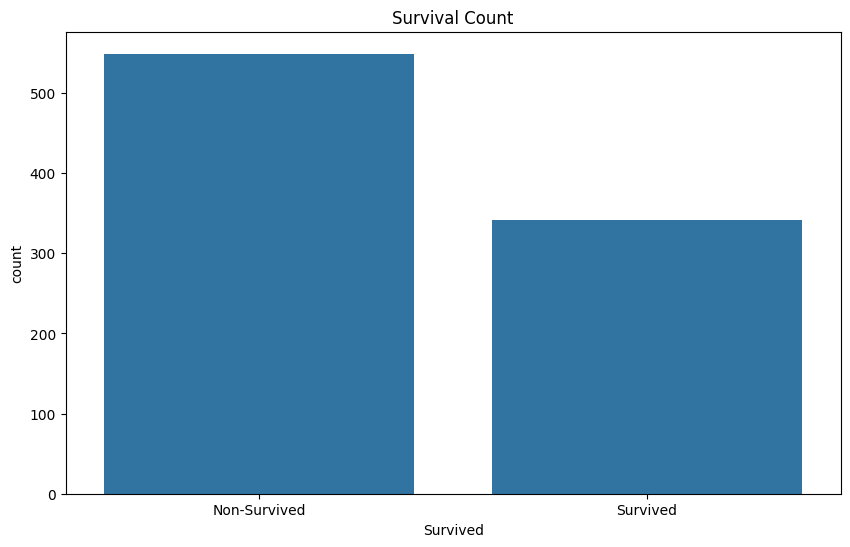

In [36]:
# Plot the count of survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Survived')
plt.xticks(ticks=[0, 1], labels=['Non-Survived', 'Survived'])
plt.title('Survival Count')
plt.show()
#Assignment: What does the graph show?

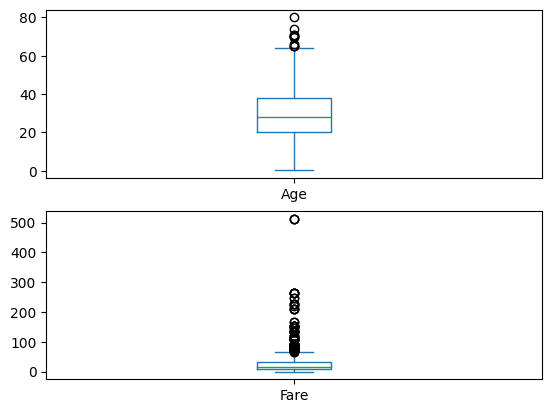

In [37]:
#plot box plots for independent variables.  (Assignment: What is a box plot?)
data_train[['Age', 'Fare']].plot(kind='box', subplots=True, layout=(2,1), sharex=False, sharey=False)
pyplot.show()

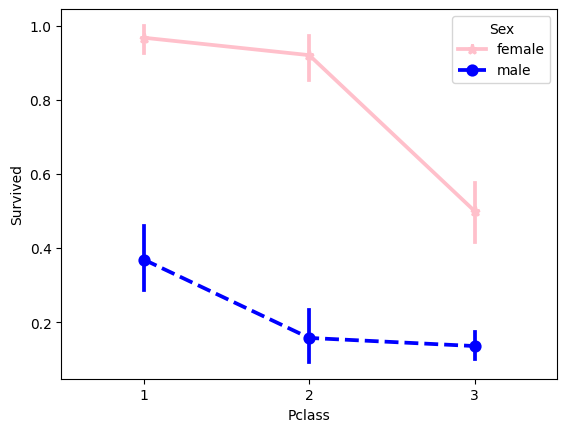

In [38]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);
#Assignment: What does the plot show?

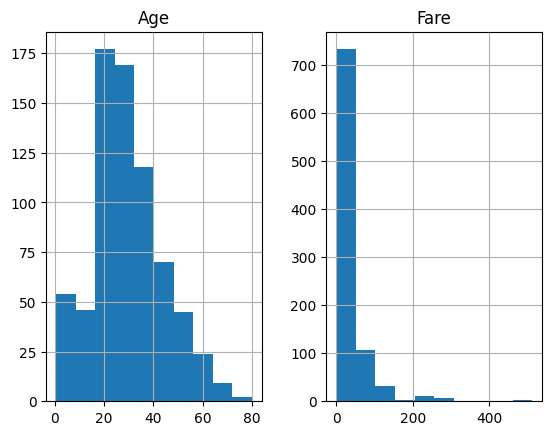

In [39]:
#Histograms for each independent variable
data_train[['Age', 'Fare']].hist()
pyplot.show()
#Assignment: If the histogram is not normally distributed, what should we do?

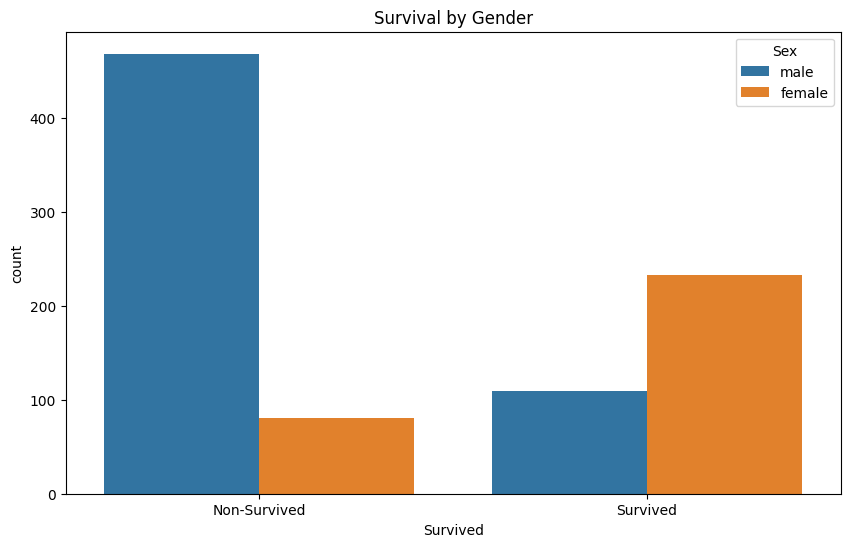

In [40]:
# Analyze survival rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='Survived', hue='Sex')
plt.xticks(ticks=[0, 1], labels=['Non-Survived', 'Survived'])
plt.title('Survival by Gender')
plt.show()

FamilySize Feature:
The FamilySize feature calculates the total number of family members each passenger had aboard the Titanic, including themselves. It is derived by adding the number of siblings/spouses (SibSp) and the number of parents/children (Parch) a passenger has, plus one for the passenger themselves.

Purpose:

To Capture Group Size: FamilySize helps quantify the size of each passenger's group, indicating whether they were traveling alone or with family. Insight into Social Dynamics: Larger family sizes might suggest a network of support or increased vulnerability during the Titanic disaster.

IsAlone Feature:
The IsAlone feature categorizes whether a passenger was traveling alone or with family.

In [41]:
train = data_train.copy()
# Create new feature 'FamilySize'
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Create new feature 'IsAlone'
train['IsAlone'] = 1  # Initialize to 1 (true)

# Recode to 0 if FamilySize > 1 using .loc
train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0

# Preview the new features
train[['FamilySize', 'IsAlone']].head()

,FamilySize,IsAlone
0,2,0
1,2,0
2,1,1
3,2,0
4,1,1


In [42]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


<ipython-input-43-b27f5152dd79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='pastel')


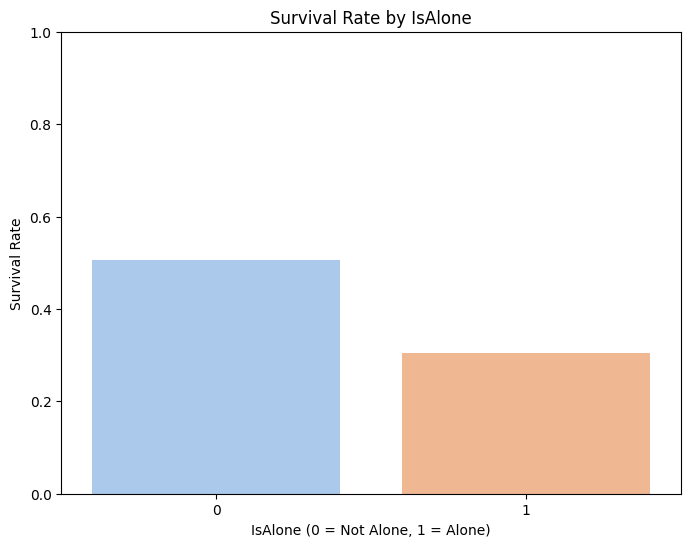

In [43]:
# Calculate survival rates by IsAlone
survival_rates = train.groupby('IsAlone')['Survived'].mean()

# Plot survival rates
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rates.index, y=survival_rates.values, palette='pastel')
plt.title('Survival Rate by IsAlone')
plt.xlabel('IsAlone (0 = Not Alone, 1 = Alone)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limit to ensure the range is from 0 to 1
plt.show()

## Transforming Features

1. To avoid overfitting, group 'Age' into logical human age groups. (Assignment: How else can you prevent overfitting?)
2. Each Cabin starts with a letter. Isolate this letter. (Why is this better?)
3. Fare is another continuous value that should be simplified. Place them into quartile bins accordingly. (Assignment: Why?)
4. Extract information from the 'Name' feature. Rather than use the full name, extract the last name and name prefix (Mr. Mrs. Etc.), then appended them as their own features.
5. Drop useless features. (Ticket and Name) (Assignment: Why?)

In [45]:
#Create buckets for age
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

#Extract first letter or Cabin
def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

#Put fare into bins
def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

#Refomat name
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df

#drop irrelevant features
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

#Apply functions to the training dataset
def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,"Allen,",Mr.


## Some Final Encoding

The last part of the preprocessing phase is to normalize labels. The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

The result is a table of numbers that looks scary to humans, but beautiful to machines.

In [46]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix'] #(Assignment: Why are encoding Age and Fare even though they are numerical?)
    df_combined = pd.concat([df_train[features], df_test[features]])

    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test

data_train, data_test = encode_features(data_train, data_test)
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,4,1,0,0,7,100,19
1,2,1,1,0,0,1,0,3,2,182,20
2,3,1,3,0,7,0,0,0,7,329,16
3,4,1,1,0,7,1,0,3,2,267,20
4,5,0,3,1,7,0,0,1,7,15,19


## Splitting up the Training Data

Now its time for some Machine Learning.

First, separate the features(X) from the labels(y).

**X_all:** All features minus the value we want to predict (Survived).

**y_all:** Only the value we want to predict.



In [47]:
from sklearn.model_selection import train_test_split

X_all = data_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = data_train['Survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

## Fitting and Tuning an Algorithm

Now it's time to figure out which algorithm is going to deliver the best model. Going with the RandomForestClassifier, but you can drop any other classifier here, such as Support Vector Machines or Naive Bayes.

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score

# Choose the type of classifier.
clf = RandomForestClassifier()
# Fit the best algorithm to the data.
clf.fit(X_train, y_train)



RandomForestClassifier()

In [49]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8212290502793296


## Confusion Matrix

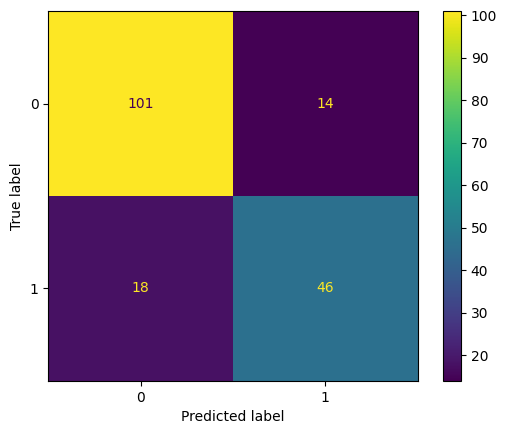

In [50]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, predictions)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Feature Importance

In [51]:
#Use the feature importance to find the most independent variables
feature_importance = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : clf.feature_importances_})
feature_importance.sort_values('Importance', ascending=False, inplace=True)
feature_importance

,Feature,Importance
7,Lname,0.288676
1,Sex,0.197577
8,NamePrefix,0.130714
0,Pclass,0.088802
2,Age,0.087785
6,Cabin,0.061752
5,Fare,0.056193
3,SibSp,0.054793
4,Parch,0.033707


## Predict the Actual Test Data

And now for the moment of truth. Make the predictions.

In [52]:

data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,1,7,0,0,0,7,401,19
1,893,3,0,0,1,0,0,7,843,20
2,894,2,1,3,0,0,1,7,552,19
3,895,3,1,7,0,0,1,7,851,19
4,896,3,0,4,1,1,1,7,342,20
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,6,0,0,1,7,753,19
414,1306,1,0,0,0,0,3,2,593,33
415,1307,3,1,0,0,0,0,7,699,19
416,1308,3,1,6,0,0,1,7,824,19


In [53]:
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop('PassengerId', axis=1)) #(Assignment: Why are dropping PassengerID?)


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
